# Numpy Lesson

## Introduction

Numpy, short for Numerical Python, is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

Many computational and data science packages use Numpy as the main building block. It is a fundamental library for scientific computing in Python.

Some features of Numpy:
- `ndarray`, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities.
- Mathematical functions for fast operations on entire arrays of data without having to write loops.
- Tools for reading/writing array data to disk and working with memory-mapped files.
- Linear algebra, random number generation, and Fourier transform capabilities.
- A C API for connecting Numpy with libraries written in C, C++, or FORTRAN.

The advantages of using Numpy:

- Numpy internally stores data in a contiguous block of memory, independent of other built-in Python objects. Numpy's library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences (e.g. lists).
- Numpy operations perform complex computations on entire arrays without the need for Python for loops, which can be slow for large sequences. This is called _vectorization_.

![numpy_vs_list](../assets/numpy_vs_python_list.png)

You can install Numpy by using `conda` or `pip`:

```bash
conda install numpy
```

```bash
pip install numpy
```

Then, you can import Numpy as follows:

In [5]:
import numpy as np

where np is a standard alias for numpy.

To give you an idea of the performance difference, consider a Numpy array of one million integers, and the equivalent Python list:

In [6]:
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

In [104]:
my_arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

Let's multiply each sequence by 2, you can use the `%timeit` magic command to measure the execution time of the code:

In [7]:
%timeit my_arr2 = my_arr * 2

4.02 ms ± 378 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit my_list2 = [x * 2 for x in my_list]

99.1 ms ± 6.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numpy operations and algorithms are generally 10 to 100 times faster than their pure Python counterparts, and use significantly less memory.

## Numpy ndarray

Numpy's `ndarray`, or N-dimensional array, is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements. 

In [9]:
data = np.array([1.5, -0.1, 3])

In [10]:
data

array([ 1.5, -0.1,  3. ])

Multiply all of the elements by 10.

In [11]:
data * 10

array([15., -1., 30.])

Add the corresponding values in each "cell" in the array.

In [12]:
data + data

array([ 3. , -0.2,  6. ])

> Practice the above array with different arithmetic operations: 
> 
> `-`, `/`, `**`, `%`, `//`.
>

### ndarray illustration

An ndarray is a multidimensional or n-dimensional array of fixed size with homogenous elements (i.e. all elements must be of the same type). Every array has a `shape`, a tuple indicating the size of each dimension, and a `dtype`, an object describing the data type of the array.

![ndarray](../assets/numpy_ndarray.png)

In [105]:
data.shape

(3,)

In [14]:
data.dtype

dtype('float64')

The easiest way to create an array is to use the `array` function.

In [15]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array.

In [16]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [110]:
arr2.dtype, type(data1), type(data2), type(arr2)

(dtype('float64'), list, list, numpy.ndarray)

In [18]:
arr2.shape

(2, 4)

We can also check the number of dimensions.

In [19]:
arr2.ndim

2

Besides `array`, there are other functions for creating new arrays. We have seen `arange` above, which is similar to the built-in `range` function but returns an array instead of a list.

`ones` and `zeros` create arrays of 1s and 0s, respectively, with a given length or shape. `empty` creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape.

In [ ]:
tmp = np.zeros(5)
tmp, type(tmp), tmp.dtype

(array([0., 0., 0., 0., 0.]), numpy.ndarray, dtype('float64'))

In [21]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

> Create a new array with 3 dimensions using `ones`.

You can also explicitly specify the data type of the array.

In [22]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

arr1.dtype

dtype('float64')

In [23]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

arr2.dtype

dtype('int32')

Data types provide a mapping directly onto an underlying disk or memory representation. The numerical data types are named the same way: a type name, like `float` or `int`, followed by a number indicating the number of bits per element. A standard double-precision floating point value (what's used under the hood in Python's `float` object) takes up 8 bytes or 64 bits. Thus, this type is known in Numpy as `float64`. See the following table for a list of the numerical data types.

| Data type | Type code | Description |
| --- | --- | --- |
| int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types |
| int16, uint16 | i2, u2 | Signed and unsigned 16-bit integer types |
| int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types |
| int64, uint64 | i8, u8 | Signed and unsigned 64-bit integer types |
| float16 | f2 | Half-precision floating point |
| float32 | f4 or f | Standard single-precision floating point. Compatible with C float |
| float64 | f8 or d | Standard double-precision floating point. Compatible with C double and Python float object |
| float128 | f16 or g | Extended-precision floating point |
| complex64, complex128, complex256 | c8, c16, c32 | Complex numbers represented by two 32, 64, or 128 floats, respectively |
| bool | ? | Boolean type storing True and False values |
| object | O | Python object type |
| string_ | S | Fixed-length ASCII string type (1 byte per character). For example, to create a string dtype with length 10, use 'S10' |
| unicode_ | U | Fixed-length Unicode type (number of bytes platform specific). Same specification semantics as string_ (e.g. 'U10') |

You can explicitly convert or cast an array from one dtype to another using `astype` method.

In [117]:
arr = np.array([1, 2, 3, 4, 5])

arr.dtype

dtype('int64')

In [25]:
float_arr = arr.astype(np.float64)

float_arr

array([1., 2., 3., 4., 5.])

In [26]:
float_arr.dtype

dtype('float64')

If you cast some floating-point numbers to be of integer dtype, the decimal part will be truncated.

In [27]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

You can also convert strings representing numbers to numeric form.

In [28]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If you write `float` instead of `np.float64`, Numpy will guess the data type for you.

> Create an array with a shape of (3, 4) and a data type of `float64`. Then convert it to `float32`.

## Arithmetic with ndarrays

Arithmetic operations are applied as batch operations on arrays without any `for` loops. This is called _vectorization_. Any arithmetic operations between equal-size arrays applies the operation element-wise.

![vectorization](../assets/vectorization.png)

In [119]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [30]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [31]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Broadcasting is another powerful feature of Numpy. It describes how arithmetic works between arrays of different shapes. For example, you can just think of the smaller array (or scalar value) being replicated multiple times to match the shape of the larger array.

In [122]:
arr + np.array([1, 1, 1])

array([[2., 3., 4.],
       [5., 6., 7.]])

Here, `[1, 1, 1]` is stretched or broadcasted across the larger array `arr` so that it matches the shape.

In [33]:
arr1 = np.array([1, 2, 3, 4])

In [34]:
arr1 + 4

array([5, 6, 7, 8])

4 becomes [4, 4, 4, 4] beneath the hood, then arithmetic happens elementwise.

In [35]:
arr1 ** 2

array([ 1,  4,  9, 16])

In [36]:
1 / arr1

array([1.        , 0.5       , 0.33333333, 0.25      ])

To find out more about broadcasting, check out the [official documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).

Comparison between arrays of the same size yield boolean arrays.

In [37]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [38]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Indexing and slicing

Indexing and slicing allow you to select subsets of array data.

One-dimensional arrays are simple; on the surface they act similarly to Python lists.

In [39]:
arr = np.arange(10)

arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Indexing to select a single element.

In [40]:
arr[5]

5

Slicing to select a range of elements.

In [41]:
arr[5:8]

array([5, 6, 7])

You can also assign value to it, which will be propagated to the entire selection.

In [42]:
arr[5:8] = 12

arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array (in-place).

In [43]:
arr_slice = arr[5:8]

arr_slice

array([12, 12, 12])

In [44]:
arr_slice[1] = 10
arr

array([ 0,  1,  2,  3,  4, 12, 10, 12,  8,  9])

The "bare" slice `[:]` will assign to all values in an array.

In [45]:
arr_slice[:] = 64

arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays.

In [46]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr2d[1]

array([4, 5, 6])

You can index it "twice" to get individual elements. These two expressions are equivalent.

In [47]:
arr2d[1][2]

6

In [48]:
arr2d[1, 2]

6

For 2D array indexing the syntax is `arr2d[row_index, col_index]` or `arr2d[axis_0_index, axis_1_index]`. Think of axis 0 as the "rows" of the array and axis 1 as the "columns."

![2d_array_indexing](../assets/ndarray_axis_index.png)

To slice out the first two rows of the `arr2d` array, you can pass `[:2]` as the row index.

In [49]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

You can pass multiple slices just like you can pass multiple indexes:

In [50]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

You can mix indexing and slicing.

In [51]:
arr2d[1, :2]

array([4, 5])

Passing a slice with `:` means to select the entire axis. To select the first column.

In [52]:
arr2d[:, :1] # or arr2d[:, 0]

array([[1],
       [4],
       [7]])

In [53]:
# check the shape

arr2d[:, :1].shape

(3, 1)

To select the first row.

In [54]:
arr2d[:1, :] # or arr2d[0, :]

array([[1, 2, 3]])

In [55]:
# check the shape

arr2d[:1, :].shape

(1, 3)

> Assign values such that the final array looks like the following:
>
> | 1 | 2 | 3 |
> | --- | --- | --- |
> | 4 | -1 | -1 |
> | 7 | 8 | 9 |


## Boolean indexing

Let's consider an example where we have an array of names with duplicates, and an array of scores (for 2 subjects) that correspond to each name.

In [56]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
scores = np.array([[75, 80], [85, 90], [95, 100], [100, 77], [85, 92], [95, 80], [72, 80]])

In [57]:
scores

array([[ 75,  80],
       [ 85,  90],
       [ 95, 100],
       [100,  77],
       [ 85,  92],
       [ 95,  80],
       [ 72,  80]])

If we want to select all the rows with the corresponding name 'Bob'. Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. Thus, comparing `names` with the string 'Bob' yields a boolean array.

In [58]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

This boolean array can be passed when indexing the array.

In [59]:
scores[names == "Bob"]

array([[ 75,  80],
       [100,  77]])

You can mix boolean indexing with other slicing and indexing methods.

In [123]:
scores[names == "Bob", 1]

array([80, 70])

In [127]:
scores[names == "Bob"][1]

array([100,  70])

To select everything but 'Bob', you can either use `!=` or negate the condition using `~`.

In [61]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [62]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [63]:
scores[names != "Bob"]

array([[ 85,  90],
       [ 95, 100],
       [ 85,  92],
       [ 95,  80],
       [ 72,  80]])

`~` operator can be useful when you want to invert a boolean array referenced by a variable.

In [64]:
cond = names == "Bob"

cond

array([ True, False, False,  True, False, False, False])

In [65]:
scores[~cond]

array([[ 85,  90],
       [ 95, 100],
       [ 85,  92],
       [ 95,  80],
       [ 72,  80]])

> Show the scores for `Joe`.

You can select two or more names by combining multiple boolean conditions. Use boolean arithmetic operators like `&` (and) and `|` (or).

In [66]:
mask = (names == "Bob") | (names == "Will")

mask

array([ True, False,  True,  True,  True, False, False])

In [67]:
scores[mask]

array([[ 75,  80],
       [ 95, 100],
       [100,  77],
       [ 85,  92]])

In [68]:
scores > 80

array([[False, False],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [ True, False],
       [False, False]])

You can also set the values based on these boolean arrays. For example, to set all scores less than 80 to 70:

In [69]:
scores[scores < 80] = 70

In [70]:
scores

array([[ 70,  80],
       [ 85,  90],
       [ 95, 100],
       [100,  70],
       [ 85,  92],
       [ 95,  80],
       [ 70,  80]])

To select a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order.

In [71]:
arr = np.zeros((8, 4))

for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [132]:
arr = np.zeros((8, 4))
one_d_array = np.array(range(8))

# Reshape one_d_array to (8, 1) to broadcast across columns
result = arr + one_d_array[:, np.newaxis]
# Or: result = arr + one_d_array.reshape(-1, 1)

print("Original arr:\n", arr)
print("\none_d_array (original):\n", one_d_array)
print("\nResult (one_d_array added to each column):\n", result)
print("Result shape:", result.shape)

Original arr:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

one_d_array (original):
 [0 1 2 3 4 5 6 7]

Result (one_d_array added to each column):
 [[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
Result shape: (8, 4)


In [72]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Negative indices select rows from the end.

In [73]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

## Reshaping and transposing arrays

Arrays have the `reshape` method to change the shape of a given array to a new shape that has the same number of elements. For example, you can reshape a 1D array to a 2D array with 2 rows and 3 columns.

In [138]:
arr = np.arange(15).reshape((5, 3))

arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

Arrays have the `transpose` method for rearranging data. For a 2D array, `transpose` will return a new view on the data with axes swapped.

In [139]:
arr.transpose()

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

`T` attribute is a shortcut for `transpose`.

In [140]:
arr.T

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

> Create an array with 3 dimensions using `arange` and `reshape`.

## Universal functions

A universal function, or `ufunc`, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [77]:
arr = np.arange(10)

arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
# calculate the square root of each element in the array

np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [79]:
# calculate the exponential of each element in the array
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as `add` or `maximum`, take 2 arrays (thus, binary ufuncs) and return a single array as the result.

In [80]:
x = np.array([3, 7, 15, 5, 12])
y = np.array([11, 2, 4, 6, 8])

np.maximum(x, y)

array([11,  7, 15,  6, 12])

You can refer to the [Numpy documentation](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs) for a list of all available universal functions.

> Search for a ufunc that returns element-wise quotient and remainder simultaneously.
>
> Run it on x and y. Note that it will return a tuple of two arrays.

## Conditional Logic

If you want to evaluate all elements in an array based on a condition, you can use `np.where`, a vectorized version of the ternary expression `x if condition else y`.

Suppose we had a boolean array and two array of values:

In [141]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

If we wanted to take a value from `xarr` whenever the corresponding value in `cond` is `True` otherwise take the value from `yarr`:

In [82]:
np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [147]:
a = np.array([3,4,5,6,7])
b = np.array([2,4,6,7,10])
np.where(a<b,a,b)

array([2, 4, 5, 6, 7])

The second and third arguments to `numpy.where` don’t need to be arrays; one or both of them can be scalars. A typical use of `where` in data analysis is to produce a new array of values based on another array. 

## Array methods

You can generate a random array using `np.random` module. The `randn` function returns a sample (or samples) from the "standard normal" distribution. A standard normal distribution is a normal distribution with a mean of 0 and standard deviation of 1.

Here we generate a random 3x4 array of samples from the standard normal distribution.

In [83]:
arr = np.random.randn(3, 4)

arr

array([[-1.05569919,  0.4018056 , -0.9963807 , -0.37764766],
       [ 0.73369254,  1.03149894,  0.50234171,  0.6585205 ],
       [-0.98636661, -0.46045083,  1.56371103,  0.48882455]])

In [84]:
# average
arr.mean()

0.12532082456789811

In [85]:
# you can also use universal function
np.mean(arr)

0.12532082456789811

In [86]:
# sum

arr.sum()

1.5038498948147774

You can also provide an optional argument `axis` that specifies the axis along which the statistic is computed, resulting in an array with one fewer dimension.

In [87]:
arr.mean(axis=1)

array([-0.50698048,  0.73151342,  0.15142953])

In [88]:
arr.mean(axis=0)

array([-0.43612442,  0.32428457,  0.35655735,  0.2565658 ])

`axis=1` means "compute across the columns," where `axis=0` means "compute down the rows."

Refer to the diagram again for the illustration on axes.

![ndarray](../assets/numpy_ndarray.png)

> Compute the sum across the columns of `arr`.

For boolean arrays, `any` tests whether one or more values in an array is `True`, while `all` checks if every value is `True`.

In [89]:
bools = np.array([False, False, True, False])

In [90]:
bools.any()

True

In [91]:
bools.all()

False

Like Python’s built-in list type, NumPy arrays can be sorted with the `sort` method. Note that this method sorts a data array _in-place_, meaning that the array contents are rearranged rather than a new array being created.

In [92]:
arr = np.random.randn(8)

arr

array([-0.41265571, -0.6358059 , -1.60127026,  0.49543587,  1.96025244,
       -0.33244832, -0.91257604,  0.48702539])

In [93]:
arr.sort()

In [94]:
arr

array([-1.60127026, -0.91257604, -0.6358059 , -0.41265571, -0.33244832,
        0.48702539,  0.49543587,  1.96025244])

## Unique and Other Set Logic

You can use `unique` to return a sorted unique values of an array.

In [95]:
names = np.array(['Bob', 'Will', 'Joe', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [96]:
np.unique(np.array([3, 3, 3, 2, 2, 1, 1, 4, 4]))

array([1, 2, 3, 4])

`in1d` tests membership of the values in one array in another, returning a boolean array.

In [97]:
np.in1d([2, 3, 6], [1, 2, 3, 4, 5])

array([ True,  True, False])

Refer to the [official documentation](https://numpy.org/doc/stable/reference/routines.set.html) for more set operations.

> Search for a set function that finds the common values between two arrays.
>
> Run it on x and y arrays below.

In [98]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])

## Linear Algebra

Linear algebra operations, like matrix multiplication, decompositions, determinants, and other square matrix math, are an important part of many array libraries. 

Multiplying two two-dimensional arrays with `*` is an element-wise product, while matrix multiplications require either using the `dot` function or the `@` infix operator.

![matrix_multiplication](../assets/matrix_multiplication.png)

In [99]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])

x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [100]:
# you can also use the @ operator

x @ y

array([[ 28,  64],
       [ 67, 181]])

In [101]:
# or the dot function

np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

You can refer to the [official documentation](https://numpy.org/doc/stable/reference/routines.linalg.html) for more linear algebra operations.

> Search for a linalg function that computes the determinant of a matrix.
>
> Run it on the array below.

In [102]:
a = np.array([[1, 2], [3, 4]])

Fourier Transform

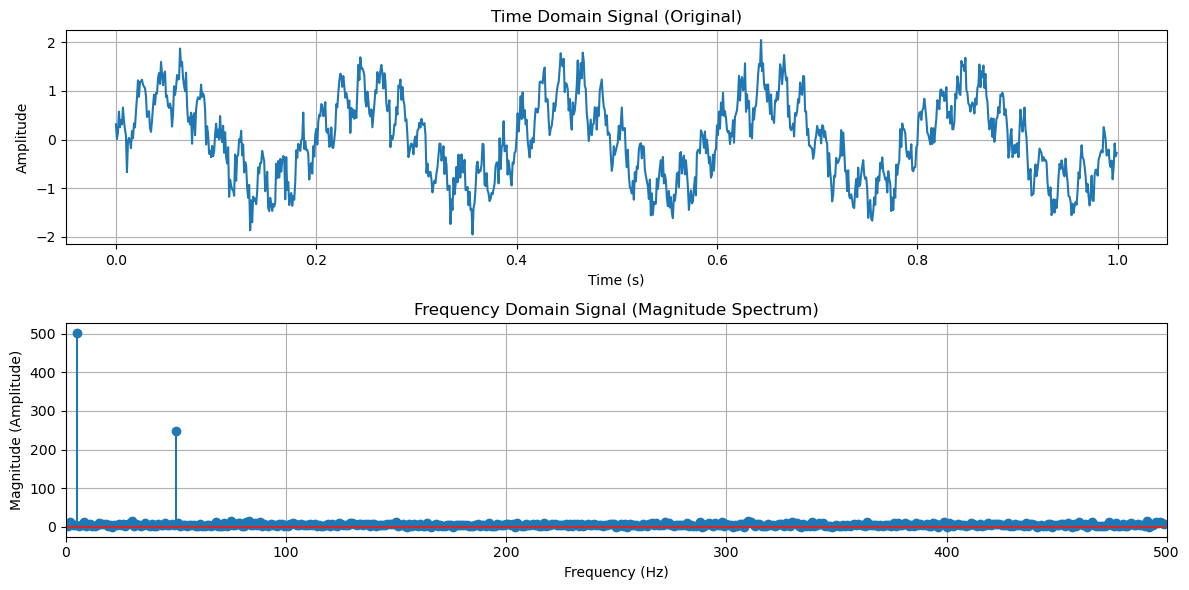

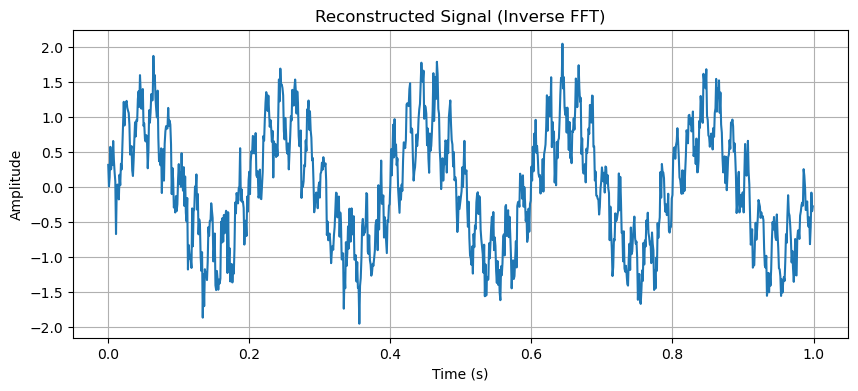

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# This is the line you need for plots to show directly in Jupyter/VS Code
%matplotlib inline

# 1. Create a sample signal
# Define parameters
sampling_rate = 1000  # Samples per second (Hz)
duration = 1          # Duration of the signal in seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False) # Time vector

# Create a signal with two distinct frequencies
frequency1 = 5  # Hz
amplitude1 = 1.0
signal1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t)

frequency2 = 50  # Hz
amplitude2 = 0.5
signal2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t)

# Add some high-frequency noise to the signal
noise = 0.2 * np.random.randn(len(t))

# Combine the signals
composite_signal = signal1 + signal2 + noise

# 2. Plot the original signal in the time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st plot
plt.plot(t, composite_signal)
plt.title('Time Domain Signal (Original)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# 3. Perform the Fast Fourier Transform (FFT)
N = len(composite_signal) # Number of samples
fft_result = np.fft.fft(composite_signal)

# Calculate the corresponding frequencies for the FFT result
# fftfreq helps map the FFT output indices to actual frequencies
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# 4. Plot the magnitude (amplitude) spectrum in the frequency domain
# We usually only care about the positive frequencies for real-valued signals
# The FFT output is symmetric, so we take the first half (N//2)
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd plot
plt.stem(frequencies[:N//2], np.abs(fft_result[:N//2]))
plt.title('Frequency Domain Signal (Magnitude Spectrum)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (Amplitude)')
plt.xlim(0, sampling_rate / 2) # Show up to the Nyquist frequency (sampling_rate/2)
plt.grid(True)
plt.tight_layout()
plt.show() # This line is still good practice to explicitly render the plot

# Optional: Inverse FFT to reconstruct the signal (demonstrates reversibility)
reconstructed_signal = np.fft.ifft(fft_result)

plt.figure(figsize=(10, 4))
plt.plot(t, np.real(reconstructed_signal)) # Take the real part as original signal was real
plt.title('Reconstructed Signal (Inverse FFT)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show() # And here too